In [ ]:
image preprocessing

In [1]:
!pip install opencv-python

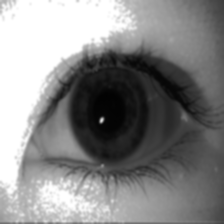

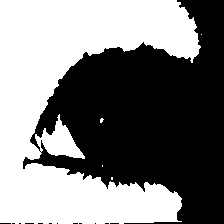

In [3]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load the iris image
img_path = '/content/drive/MyDrive/aeval1.bmp'
iris_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Resize the image (adjust dimensions as needed)
iris_image = cv2.resize(iris_image, (224, 224))

# Enhance contrast using histogram equalization
iris_image = cv2.equalizeHist(iris_image)

# Apply Gaussian blur to reduce noise
iris_image = cv2.GaussianBlur(iris_image, (5, 5), 0)

# Thresholding to create a binary image
_, iris_binary = cv2.threshold(iris_image, 128, 255, cv2.THRESH_BINARY)

# Display the original and preprocessed images
cv2_imshow(iris_image)
cv2_imshow(iris_binary)

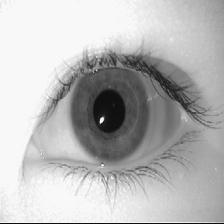

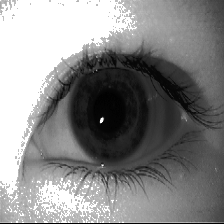

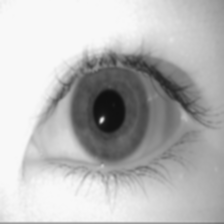

In [4]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load the iris image
img_path = '/content/drive/MyDrive/aeval1.bmp'
iris_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Resize the image (adjust dimensions as needed)
iris_image = cv2.resize(iris_image, (224, 224))

# Enhance contrast using histogram equalization
iris_image_equalized = cv2.equalizeHist(iris_image)

# Apply Gaussian blur to reduce noise
iris_image_blurred = cv2.GaussianBlur(iris_image, (5, 5), 0)

# Display the original and preprocessed images
cv2_imshow(iris_image)
cv2_imshow(iris_image_equalized)
cv2_imshow(iris_image_blurred)


1/1 [==============================] - 1s 1s/step


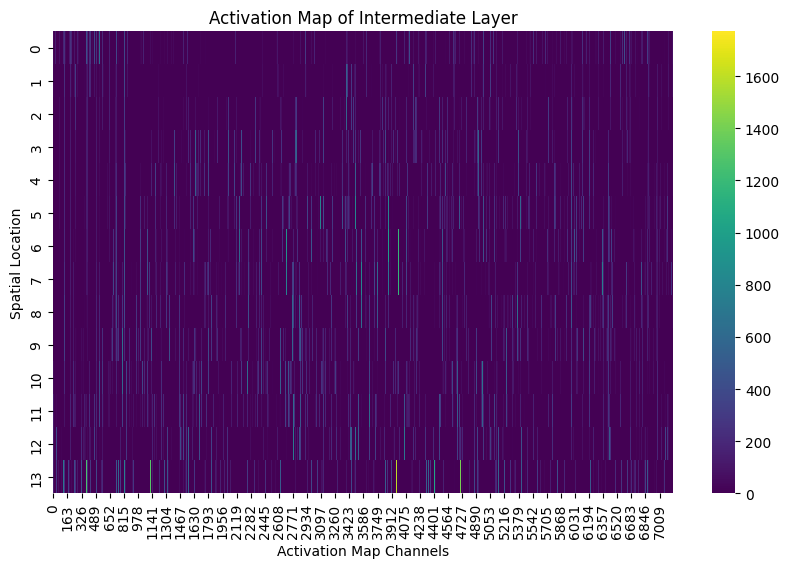

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.models import Model
import seaborn as sns

# Load the VGG16 model pre-trained on ImageNet data
base_model = VGG16(weights='imagenet')

# Define a new model with an intermediate layer as output
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

# Load and preprocess the preprocessed iris image
iris_image_path = '/content/drive/MyDrive/aeval1.bmp'
iris_image = cv2.imread(iris_image_path, cv2.IMREAD_GRAYSCALE)
iris_image_resized = cv2.resize(iris_image, (224, 224))
iris_image_resized = cv2.cvtColor(iris_image_resized, cv2.COLOR_GRAY2BGR)  # Convert to 3 channels
iris_image_resized = np.expand_dims(iris_image_resized, axis=0)
iris_image_resized = preprocess_input(iris_image_resized)

# Get the feature vector (output of the specified intermediate layer)
features = model.predict(iris_image_resized)

# Reshape the features for plotting
features_reshaped = features.reshape((features.shape[1], -1))

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(features_reshaped, cmap='viridis', annot=False)
plt.title('Activation Map of Intermediate Layer')
plt.xlabel('Activation Map Channels')
plt.ylabel('Spatial Location')
plt.show()


In [6]:
import cv2
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image

# Load the VGG16 model pre-trained on ImageNet data
base_model = VGG16(weights='imagenet')

# Load and preprocess the image
img_path = '/content/drive/MyDrive/aeval1.bmp'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Get the feature vector (output of the last layer before the softmax)
features = base_model.predict(img_array)

# Display the shape of the extracted features
print("Shape of the extracted features:", features.shape)
print("Extracted features:")
print(features)



1/1 [==============================] - 1s 678ms/step
Shape of the extracted features: (1, 1000)
Extracted features:
[[1.21748759e-04 1.56792544e-03 3.93287453e-04 1.69023333e-04
  1.00505014e-04 2.09336038e-04 1.11219153e-04 1.22646787e-04
  1.61524949e-04 1.65515183e-03 1.43418772e-04 2.00510229e-04
  5.08366502e-04 4.59538540e-04 1.10776251e-04 2.14641754e-04
  1.37477546e-04 2.18577421e-04 1.70536834e-04 2.82422203e-04
  2.10552444e-05 6.38241880e-04 4.27103922e-04 2.00317125e-03
  5.53773530e-03 5.39830107e-05 1.55271264e-04 1.48751249e-04
  5.49005417e-05 4.20279015e-04 3.45781664e-05 3.68014764e-04
  4.56238595e-05 5.59869077e-05 3.79378471e-05 4.82513060e-05
  2.67249707e-04 7.52414708e-05 1.94974287e-04 9.17174330e-05
  2.30392208e-04 1.44306232e-05 1.14795381e-04 2.75313883e-04
  1.45135506e-04 1.18071612e-05 5.08116151e-04 1.49258506e-03
  1.08612046e-04 6.18623517e-06 3.57428835e-05 1.20045857e-04
  5.40713023e-04 4.18827403e-04 5.32751845e-04 2.10832353e-04
  1.89575021e-05